In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

import ir_datasets

import pandas as pd
import numpy as np
from model.data_handler import VaultDataLoader
from beir.datasets.data_loader import GenericDataLoader

FIG_PATH = "/u/poellhul/Documents/Masters/VAULT/figures"

/Tmp/lvpoellhuber/bmir-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /u/poellhul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
palette_name = "muted"
sns.color_palette(palette_name)
palette = sns.color_palette(palette_name)
palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

# 1. Introduction
Nothing to see here...

# 2. Literature Review & Background
Maybe later. 

# 3. VAULT: Validating Ad-hoc Understanding in Long Texts


## MS MARCO Corpus

### Stats


In [4]:
corpus, queries, qrels = GenericDataLoader("/Tmp/lvpoellhuber/datasets/msmarco-doc").load("train")

100%|██████████| 3201821/3201821 [00:45<00:00, 70833.41it/s]


In [10]:
corpus_df = pd.DataFrame.from_dict(corpus).transpose()


In [15]:
corpus_df["full_text"] = corpus_df["title"] + " " + corpus_df["text"]

Estimated number of words. 

In [19]:
msmarco_len = corpus_df["full_text"].str.count(" ")
msmarco_len.describe()

count    3.201821e+06
mean     1.131949e+03
std      2.381440e+03
min      1.000000e+00
25%      2.940000e+02
50%      5.830000e+02
75%      1.123000e+03
max      3.337540e+05
Name: full_text, dtype: float64

Estimated number of characters. 

In [18]:
corpus_df["full_text"].str.len().describe()

count    3.201821e+06
mean     7.024666e+03
std      1.483028e+04
min      2.000000e+00
25%      1.838000e+03
50%      3.594000e+03
75%      6.889000e+03
max      2.063417e+06
Name: full_text, dtype: float64

### Length


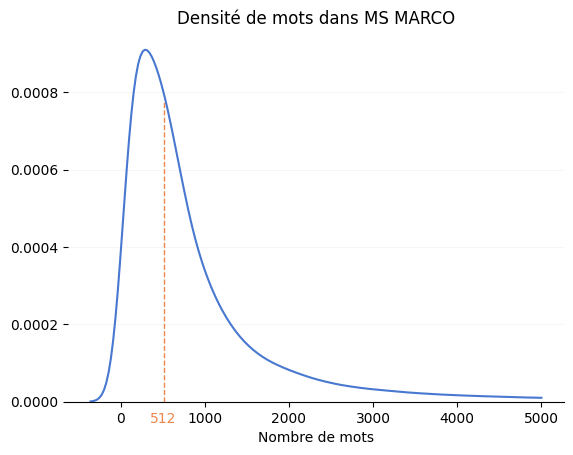

In [89]:
ax = sns.kdeplot(msmarco_len, clip=[-1000, 5000], color=palette[0])
plt.title("Densité de mots dans MS MARCO")
plt.ylabel("")
plt.xlabel("Nombre de mots")
sns.despine(left=True)
plt.grid(axis="y", color="gray", linestyle="-", linewidth=0.5, alpha=0.1)

line = ax.get_lines()[0]
x_data = line.get_xdata()
y_data = line.get_ydata()

# Find the y-value of the curve at x=512
y_at_512 = np.interp(512, x_data, y_data)*0.97

# Draw a vertical line that stops at the curve
plt.vlines(x=512, ymin=0, ymax=y_at_512, color=palette[1], linestyle="--", linewidth=1)

plt.text(512, -0.000025, "512", color=palette[1], ha="center", va="top")  

plt.savefig(FIG_PATH+"/3.msmarco-nbwords.jpeg", dpi=1000)

plt.show()

# 4. Hierarchical Model
Definitely later. Model structure will be on draw.io though. 

# 5. Results
Definitely later. See format_metrics.py especially. 

# 6. Discussion

In [14]:
dataset = ir_datasets.load("natural-questions/train")


In [ ]:
doc_dict = {}
for doc in dataset.docs_iter():
    full_docid = doc.doc_id.split("-")[0]
    if full_docid not in doc_dict:
        doc_dict[full_docid] = []
    doc_dict[full_docid].append(doc.text)


In [27]:
positions = []
for qrel in dataset.qrels_iter():
    position = qrel.doc_id.split("-")[1]
    full_docid = qrel.doc_id.split("-")[0]
    if full_docid in doc_dict:
        document = doc_dict[full_docid]

        text_pos = 0
        for i, text in enumerate(document):
            text_pos += text.count(" ")
            if i+1 == int(position):
                positions.append(text_pos)
                break

positions = pd.Series(positions).astype(int)
positions.describe()

count    132800.000000
mean       1348.909834
std        3147.977423
min           0.000000
25%         203.000000
50%         468.000000
75%        1236.000000
max      226992.000000
dtype: float64

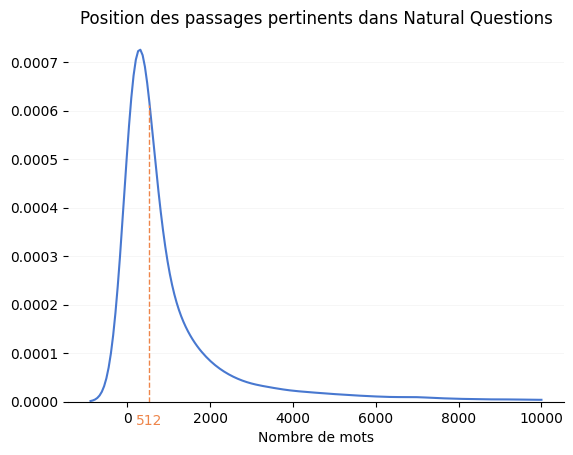

In [32]:
ax = sns.kdeplot(positions, clip=[-1000, 10000], color=palette[0])
plt.title("Position des passages pertinents dans Natural Questions")
plt.ylabel("")
plt.xlabel("Nombre de mots")
sns.despine(left=True)
plt.grid(axis="y", color="gray", linestyle="-", linewidth=0.5, alpha=0.1)

line = ax.get_lines()[0]
x_data = line.get_xdata()
y_data = line.get_ydata()

# Find the y-value of the curve at x=512
y_at_512 = np.interp(512, x_data, y_data)*0.97

# Draw a vertical line that stops at the curve
plt.vlines(x=512, ymin=0, ymax=y_at_512, color=palette[1], linestyle="--", linewidth=1)

plt.text(512, -0.000025, "512", color=palette[1], ha="center", va="top")  

plt.savefig(FIG_PATH+"/3.msmarco-nbwords.jpeg", dpi=1000)

plt.show()

# 7. Conclusion
Probably not. 